In [0]:
from fastai.vision import *

In [0]:
path = Path('data/pulmones')

In [0]:
files = ['sanos.csv', 'fumadores.csv']

In [6]:
path.ls()

[PosixPath('data/pulmones/.ipynb_checkpoints'),
 PosixPath('data/pulmones/sanos'),
 PosixPath('data/pulmones/fumadores.csv'),
 PosixPath('data/pulmones/sanos.csv'),
 PosixPath('data/pulmones/fumadores')]

In [0]:
classes = ['sanos', 'fumadores']

In [8]:
for index in range(0, len(files)):
  download_images(path/files[index], path/classes[index], max_pics=100)

In [9]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

sanos


fumadores


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [11]:
data.classes

['fumadores', 'sanos']

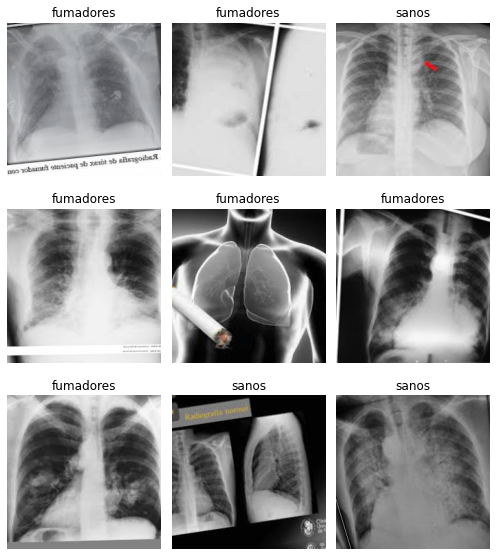

In [12]:
data.show_batch(rows=3, figsize=(7,8))

In [13]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['fumadores', 'sanos'], 2, 128, 32)

In [14]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [15]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.120667,2.198340,0.468750,00:44
1,1.245043,1.937688,0.406250,00:43
2,1.127765,2.058894,0.406250,00:42
3,1.083960,1.686883,0.562500,00:42
4,1.020668,1.705116,0.562500,00:42
5,0.964149,1.672389,0.468750,00:42
6,0.933921,1.654555,0.406250,00:42
7,0.895386,1.686045,0.437500,00:42
8,0.879546,1.688345,0.406250,00:42
9,0.850863,1.688626,0.406250,00:42


In [17]:
interp = ClassificationInterpretation.from_learner(learn)

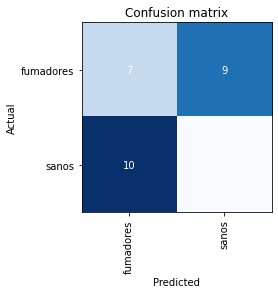

In [18]:
interp.plot_confusion_matrix()

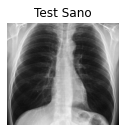

In [20]:
preditc = 'predict/sano1.jpeg'
img = open_image(path/preditc)
img.show(figsize=(2,2), title='Test Sano')

In [21]:
learn.predict(img)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


(Category tensor(1), tensor(1), tensor([0.0021, 0.9979]))

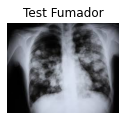

In [22]:
preditc = 'predict/fumador1.jpeg'
img2 = open_image(path/preditc)
img2.show(figsize=(2,2), title='Test Fumador')

In [23]:
learn.predict(img2)

(Category tensor(0), tensor(0), tensor([0.9027, 0.0973]))

In [0]:
preditc = 'fumadores/00000002.jpg'
img3 = open_image(path/preditc)
img3.show(figsize=(2,2), title='Test DS')

In [0]:
learn.predict(img3)